# Trained ResNet-50 classification

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from datetime import datetime
    
# Project
project_common_path = os.path.abspath(os.path.join('..', 'common'))
if not project_common_path in sys.path:
    sys.path.append(project_common_path)    

In [3]:
# Project
from data_utils import type_1_ids, type_2_ids, type_3_ids, test_ids
from data_utils import RESOURCES_PATH, GENERATED_DATA, get_annotations

In [4]:
print("\n=========================")
print("Training dataset: ")
print("- type 1: ", len(type_1_ids))
print("- type 2: ", len(type_2_ids))
print("- type 3: ", len(type_3_ids))

print("Test dataset: ")
print("- ", len(test_ids))
print("=========================\n")



Training dataset: 
('- type 1: ', 250)
('- type 2: ', 781)
('- type 3: ', 450)
Test dataset: 
('- ', 512)



## Check train dataset

Idea is to apply cervix mask to the whole image 

In [10]:
import cv2
from image_utils import get_image_data

import matplotlib.pylab as plt
%matplotlib inline

def plt_st(n, m):
    plt.figure(figsize=(n, m))

In [43]:
image_id = type_1_ids[1]

img = get_image_data(image_id, "Type_1")

os_cervix = get_image_data(image_id + "_" + "Type_1", "trainval_label").transpose([1, 2, 0])
os_cervix = cv2.resize(os_cervix, dsize=img.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

cervix_mask = os_cervix[:, :, 1]
os_mask = os_cervix[:, :, 0]

img2 = crop_to_mask(img, cervix_mask)
img3 = crop_to_mask(img, os_mask)

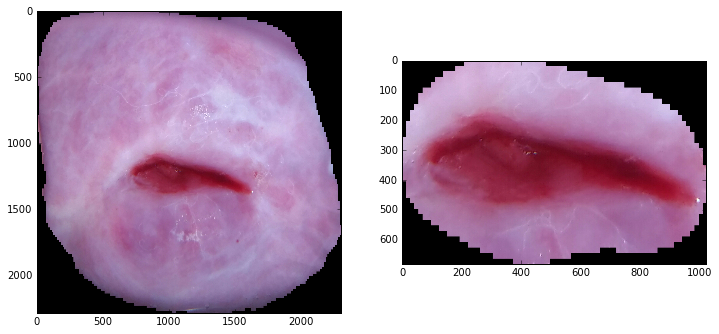

In [44]:
plt_st(12, 6)
plt.subplot(121)
plt.imshow(img2)
plt.subplot(122)
plt.imshow(img3)

In [42]:
import numpy as np

def crop_to_mask(img, mask):
    img = cv2.bitwise_and(img, img, mask=mask)
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
    assert len(cnts) == 1, "Mask should have only one contour"
    rect = cv2.boundingRect(cnts[0])
    return img[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]        